In [1]:
# Shiyi (Amy) Qin and Victor Z
# UW-Madison, 2020
# use svd to compress image

## Start here if working on google collab

---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [4]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [5]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.io import imread, imsave

In [7]:
# Reading and converting the image from RGB to grayscale
in_image = imread(path+'Data/droplet1.jpg')
in_image_gray = color.rgb2gray(in_image)
in_image_d = (in_image_gray * 255).astype(np.uint8)  # Convert to uint8

In [8]:
imsave(path+'Data/droplet1g.jpg', in_image_d)

print("Original image size:", in_image_d.shape)

Original image size: (199, 199)


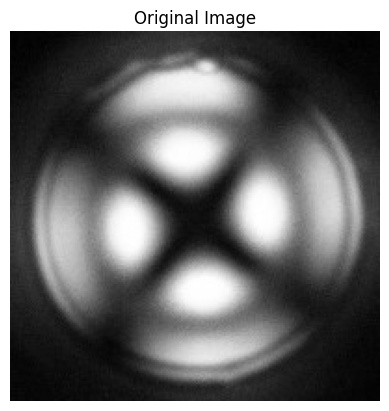

In [9]:
plt.figure()
plt.imshow(in_image_d, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [10]:
# Decomposing the image using singular value decomposition
in_image_d = in_image_d.astype(np.float64)  # Convert to float for SVD
U, S, Vt = np.linalg.svd(in_image_d, full_matrices=False)

original_rank = np.linalg.matrix_rank(in_image_d)
print("Original rank:", original_rank)


Original rank: 199


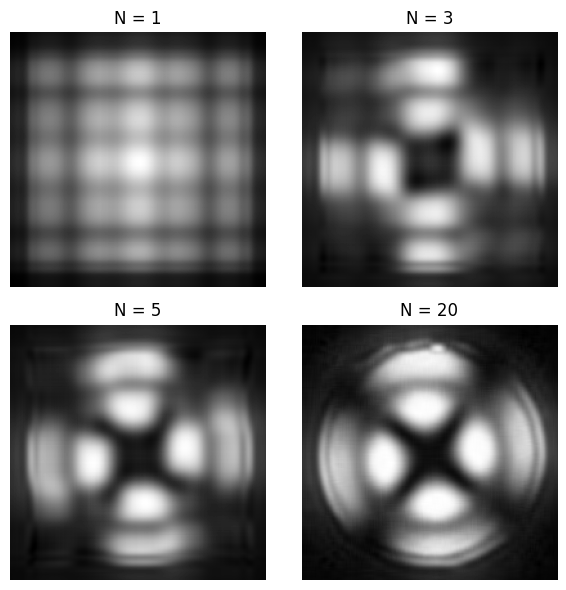

In [14]:
# Using different number of singular values (diagonal of S) to compress and reconstruct the image
disp_er = []
num_s_vals = []

Nv = [1, 3, 5, 20]
plt.figure(figsize=(6, 6))
for idx, N in enumerate(Nv):
    # Discard the diagonal values not required for compression
    S_compressed = np.zeros_like(S)
    S_compressed[:N] = S[:N]

    # Construct an image using the selected singular values
    D = np.dot(U[:, :N] * S_compressed[:N], Vt[:N, :])

    error = np.sum((in_image_d - D) ** 2)

    # Display and compute error
    plt.subplot(2, 2, idx + 1)
    plt.imshow(D, cmap='gray')
    plt.title(f'N = {N}')
    plt.axis('off')

    # Store values for display
    disp_er.append(error)
    num_s_vals.append(N)

plt.tight_layout()
plt.show()

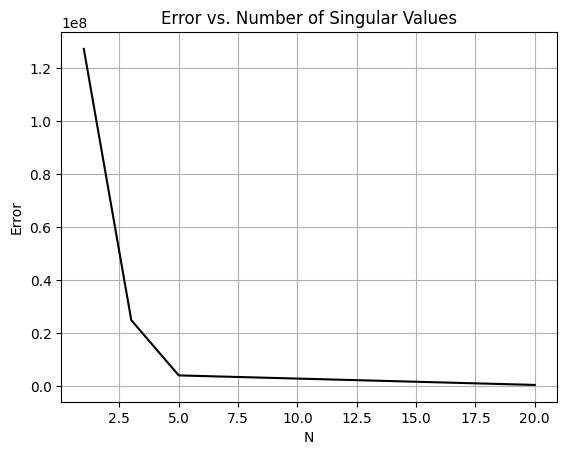

In [16]:
# Display the error graph
plt.figure()
plt.plot(num_s_vals, disp_er, 'k')
plt.grid(True)
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Error vs. Number of Singular Values')
plt.show()